In [18]:

%pip install statsbombpy
%pip install plotly


Note: you may need to restart the kernel to use updated packages.
  Using cached plotly-5.9.0-py2.py3-none-any.whl (15.2 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from statsbombpy import sb
import pandas as pd
from collections import Counter
import numpy as np

***Exploratory Data Analysis***

In [66]:
comp = pd.DataFrame(sb.competitions())
comp.head(50)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only



,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [67]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             40 non-null     int64 
 1   season_id                  40 non-null     int64 
 2   country_name               40 non-null     object
 3   competition_name           40 non-null     object
 4   competition_gender         40 non-null     object
 5   competition_youth          40 non-null     bool  
 6   competition_international  40 non-null     bool  
 7   season_name                40 non-null     object
 8   match_updated              40 non-null     object
 9   match_updated_360          40 non-null     object
 10  match_available_360        2 non-null      object
 11  match_available            40 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 3.3+ KB


In [37]:
# Different types of competitions
print(comp['competition_name'].unique())

['Champions League' "FA Women's Super League" 'FIFA World Cup' 'La Liga'
 'NWSL' 'Premier League' 'UEFA Euro' "Women's World Cup"]


***Match in Competition***

In [93]:
matches = pd.DataFrame(sb.matches(competition_id=16, season_id=22))
matches.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only



,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18236,2011-05-28,20:45:00.000,Europe - Champions League,2010/2011,Barcelona,Manchester United,3,1,available,scheduled,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,1,Final,Wembley Stadium,Viktor Kassai,Josep Guardiola i Sala,Alex Ferguson,1.0.3,None,None


In [6]:
# Counting Goals in a Season
print(matches[["away_score","home_score"]].sum())

away_score    78
home_score    91
dtype: int64


In [7]:
# Counting average goals in a Season
print(matches[["away_score","home_score"]].mean())

away_score    1.218750
home_score    1.421875
dtype: float64


***Event in Match***

In [115]:
event = sb.events(match_id=18236)
pd.set_option('display.max_columns', None)
event.head(50)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only



,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_backheel,pass_body_part,pass_cross,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_recipient,pass_shot_assist,pass_switch,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8eb54fd1-3b77-4de8-a6eb-63cb080010e7,1,NaN,NaN,18236,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Barcelona,217,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",Barcelona,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dc677ade-3585-44c9-a377-c795a65c6310,2,NaN,NaN,18236,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Barcelona,217,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4222, 'lineup': [{'player': {'id...",Manchester United,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de4c3384-3748-46b1-b6f0-6d7fd5ed41ab,3,NaN,NaN,18236,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Barcelona,217,[206bb9ff-6848-4c98-8b81-797aaf24192b],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206bb9ff-6848-4c98-8b81-797aaf24192b,4,NaN,NaN,18236,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Barcelona,217,[de4c3384-3748-46b1-b6f0-6d7fd5ed41ab],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60815484-b3cd-4473-8c83-9347cf6daa4b,2218,NaN,NaN,18236,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,91,Barcelona,217,[b9090216-bcf1-4c4f-b128-e81689d1144b],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b9090216-bcf1-4c4f-b128-e81689d1144b,2219,NaN,NaN,18236,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,91,Barcelona,217,[60815484-b3cd-4473-8c83-9347cf6daa4b],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.580900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a10ce602-229f-4c8a-8c61-95f8e7438a4a,5,NaN,"[61.0, 41.0]",18236,0,NaN,NaN,2.356194,NaN,NaN,Right Foot,NaN,"[60.0, 42.0]",NaN,Ground Pass,1.414214,NaN,Wayne Mark Rooney,NaN,NaN,Kick Off,1,From Kick Off,Javier Hernández Balcázar,3058.0,Left Center Forward,2,Manchester United,39,[ee82dbf9-b9f5-4eea-84f1-e243d1e97f51],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:00:01.213,Pass,N

In [95]:
event.shape

(4326, 72)

In [38]:
# Different types of play patterns
print(event['play_pattern'].unique())

['Regular Play' 'From Throw In' 'From Kick Off' 'From Free Kick'
 'From Keeper' 'From Goal Kick' 'From Counter' 'From Corner']


In [10]:
# Unique type of event
print(event['type'].unique())

['Starting XI' 'Half Start' 'Pass' 'Ball Receipt*' 'Carry' 'Clearance'
 'Pressure' 'Block' 'Dribbled Past' 'Dribble' 'Foul Committed' 'Foul Won'
 'Miscontrol' 'Ball Recovery' 'Dispossessed' 'Duel' 'Shot' 'Goal Keeper'
 'Interception' 'Offside' 'Tactical Shift' 'Injury Stoppage' 'Half End'
 'Bad Behaviour' 'Substitution' '50/50']


In [11]:
type_dict = event['type'].value_counts()

In [12]:
dict(type_dict)

{'Pass': 1001,
 'Ball Receipt*': 919,
 'Carry': 845,
 'Pressure': 194,
 'Ball Recovery': 83,
 'Foul Committed': 43,
 'Foul Won': 39,
 'Block': 36,
 'Dribble': 33,
 'Duel': 29,
 'Goal Keeper': 28,
 'Dribbled Past': 27,
 'Shot': 27,
 'Clearance': 20,
 'Interception': 19,
 'Dispossessed': 17,
 'Miscontrol': 16,
 'Substitution': 6,
 'Half End': 4,
 'Half Start': 4,
 'Bad Behaviour': 2,
 'Starting XI': 2,
 'Tactical Shift': 2,
 '50/50': 2,
 'Injury Stoppage': 1,
 'Offside': 1}

***Statsical Approach***

In [40]:

x = pd.DataFrame(sb.matches(competition_id=43 , season_id = 3))
match_ids = x['match_id'].tolist()

type_dict = Counter(dict())

for m in match_ids:
    y =  sb.events(match_id = m)
    type_dict_temp = y['type'].value_counts()
    type_dict_temp = dict(type_dict_temp)
    type_dict_temp = Counter(type_dict_temp)
    type_dict += type_dict_temp    
print(type_dict)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_client.py:20: NoAuthWarning:

credentials were not supplied. open data access only

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/api_clie

Counter({'Pass': 62881, 'Ball Receipt*': 58972, 'Carry': 50521, 'Pressure': 23462, 'Ball Recovery': 5676, 'Duel': 3141, 'Block': 2162, 'Dribble': 2109, 'Clearance': 2074, 'Goal Keeper': 1975, 'Foul Committed': 1876, 'Foul Won': 1789, 'Camera On': 1749, 'Shot': 1706, 'Miscontrol': 1535, 'Dribbled Past': 1441, 'Interception': 1276, 'Dispossessed': 1189, 'Camera off': 393, 'Substitution': 382, 'Injury Stoppage': 291, 'Half Start': 284, 'Half End': 284, 'Starting XI': 128, 'Tactical Shift': 116, '50/50': 108, 'Player Off': 63, 'Player On': 63, 'Referee Ball-Drop': 57, 'Shield': 56, 'Bad Behaviour': 40, 'Error': 37, 'Offside': 26, 'Own Goal For': 12, 'Own Goal Against': 12})


In [41]:
# Distribution of events and there frequency
import plotly.express as px
fig = px.bar(x=[a for a in list(type_dict.keys())], y=[a for a in list(type_dict.values())])
fig.show()

In [63]:
new_list = []
for index, row in comp.iterrows():
    new_list_temp = [row['competition_id'],row['season_id']]
    new_list.append(new_list_temp)

new_match_id = []
for n in new_list:
    if n[0] == int:

        y = sb.matches(competition_id=comp, season_id = match)
        new_match_id_temp = y['match_id'].tolist()
        new_match_id.append(new_match_id_temp)



In [87]:
new_match_id = comp[['competition_id','season_id']].values.tolist()
new_match_id.remove([16,76])
print(new_match_id)

[[16, 4], [16, 1], [16, 2], [16, 27], [16, 26], [16, 25], [16, 24], [16, 23], [16, 22], [16, 21], [16, 41], [16, 39], [16, 37], [16, 44], [37, 90], [37, 42], [37, 4], [43, 3], [11, 90], [11, 42], [11, 4], [11, 1], [11, 2], [11, 27], [11, 26], [11, 25], [11, 24], [11, 23], [11, 22], [11, 21], [11, 41], [11, 40], [11, 39], [11, 38], [11, 37], [49, 3], [2, 44], [55, 43], [72, 30]]


In [ ]:
new_list = []
for n in new_match_id:

    y = sb.matches(competition_id= n[0], season_id=n[1])
    new_match_id_temp = y['match_id'].values.tolist()
    new_list.append(new_match_id_temp)

In [ ]:
# Distribution of events in the matches
len_event = []
for match in new_list:
    for m in match:
        y =  sb.events(match_id = m)
        len_event_temp = len(y)
        len_event.append(len_event_temp)


In [107]:
fig = px.histogram(len_event)
fig.show()

In [108]:
fig = px.box(len_event)
fig.show()

In [ ]:
!pip install -U mplsoccer
!pip install mplsoccer

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
# Plotting a Single Match
team_1, team_2 = np.unique(event['team'])
df_team_1 = event[event['team'] == team_1]
df_team_2 = event[event['team'] == team_2]

pitch = Pitch(pitch_color='white', line_color='black', stripe=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(10, 5))

plt.scatter(df_team_1['x_start'], df_team_1['y_start'], c='red', edgecolors="k", zorder=12, 
            alpha=0.5, label='%s: %s events' %(team_id2team[team_1]['name'], len(df_team_1)))
plt.scatter(df_team_2['x_start'], df_team_2['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
            alpha=0.7, label='%s: %s events' %(team_id2team[team_2]['name'], len(df_team_2)))
plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
plt.title(match_label, fontsize=20)
plt.show()

In [110]:
loc_event = event[['location','pass_end_location']]
loc_event.head()

,location,pass_end_location
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [111]:
loc_event = loc_event.dropna()
loc_event

,location,pass_end_location
6,"[61.0, 41.0]","[42.0, 45.0]"
7,"[43.0, 45.0]","[87.0, 12.0]"
8,"[86.0, 1.0]","[77.0, 9.0]"
9,"[78.0, 9.0]","[92.0, 8.0]"
10,"[29.0, 73.0]","[32.0, 74.0]"
...,...,...
1002,"[69.0, 15.0]","[57.0, 26.0]"
1003,"[55.0, 27.0]","[64.0, 36.0]"
1004,"[35.0, 53.0]","[64.0, 70.0]"
1005,"[71.0, 62.0]","[87.0, 16.0]"


In [112]:
loc_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 6 to 1006
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           1001 non-null   object
 1   pass_end_location  1001 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


In [118]:
location = loc_event['location'].tolist()

end_location = loc_event['pass_end_location'].tolist()

In [119]:

def stripping_location(loc):
    x_loc = []
    y_loc = []
    for l in loc:
        
        x_location_temp = l[0]
        y_location_temp = l[1]
        x_loc.append(x_location_temp)
        y_loc.append(y_location_temp)
    return x_loc,y_loc

x_loc,y_loc = stripping_location(location)
x_loc_end,y_loc_end = stripping_location(end_location)



In [120]:
loc_event['x_loc'] = x_loc
loc_event['y_loc'] = y_loc
loc_event['x_loc_end'] = x_loc_end
loc_event['y_loc_end'] = y_loc_end

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.
    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


def createPitchOld():
    #Taken from FC Python        
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color=linecolor)
    plt.plot([0,130],[90,90], color=linecolor)
    plt.plot([130,130],[90,0], color=linecolor)
    plt.plot([130,0],[0,0], color=linecolor)
    plt.plot([65,65],[0,90], color=linecolor)
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color=linecolor)
    plt.plot([0,16.5],[65,65],color=linecolor)
    plt.plot([16.5,0],[25,25],color=linecolor)
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color=linecolor)
    plt.plot([113.5,113.5],[65,25],color=linecolor)
    plt.plot([113.5,130],[25,25],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color=linecolor)
    plt.plot([5.5,5.5],[54,36],color=linecolor)
    plt.plot([5.5,0.5],[36,36],color=linecolor)
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color=linecolor)
    plt.plot([124.5,124.5],[54,36],color=linecolor)
    plt.plot([124.5,130],[36,36],color=linecolor)
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((65,45),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,45),0.8,color=linecolor)
    rightPenSpot = plt.Circle((119,45),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=linecolor)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

def createGoalMouth():
    #Adopted from FC Python
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(leftPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    
    #Draw Arcs
    ax.add_patch(leftArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

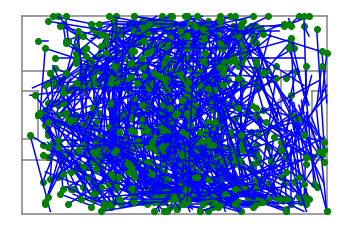

In [132]:
pitch_width = 120
pitch_height = 80
fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')


for i in range(len(loc_event)):
    plt.plot([int(x_loc[i]),int(x_loc_end[i])],
             [int(y_loc[i]),int(y_loc_end[i])], 
             color="blue")
    
    plt.plot(int(x_loc[i]),int(y_loc[i]),"o", color="green")
    
# fig, ax = plt.subplots()
plt.show()


In [14]:
print(matches.items())

<generator object DataFrame.items at 0x13e66be60>
